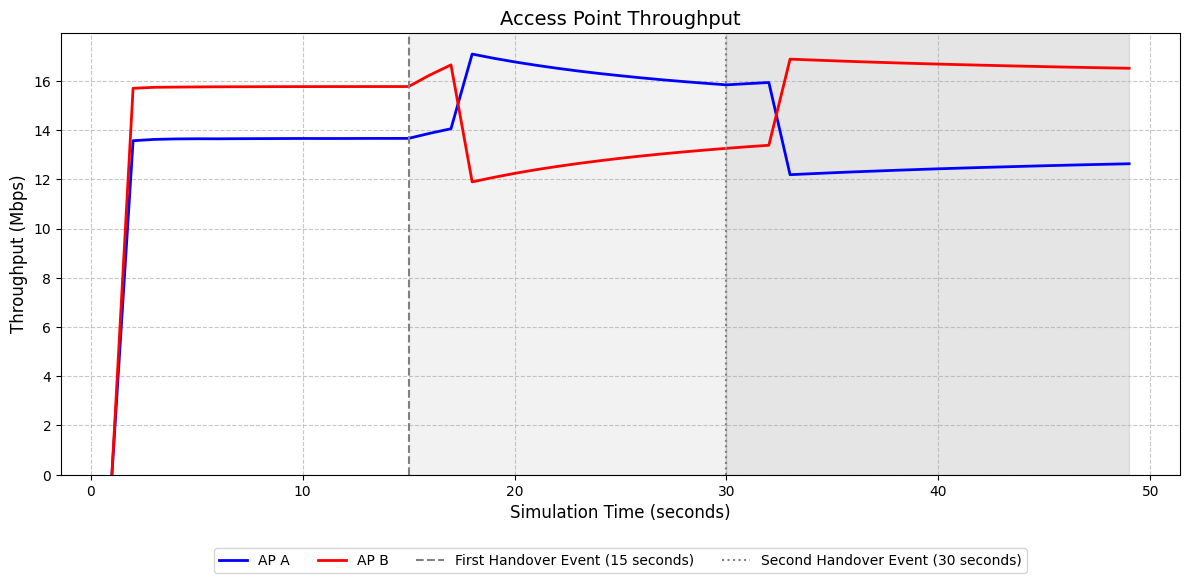

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV file
data = pd.read_csv('throughput.csv')

# Create a figure and axis
plt.figure(figsize=(12, 6))

# Plot the throughput data
plt.plot(data['Time'], data['Throughput_A'], 'b-', linewidth=2, label='AP A')
plt.plot(data['Time'], data['Throughput_B'], 'r-', linewidth=2, label='AP B')

# Add vertical lines at handover event times
plt.axvline(x=15, color='gray', linestyle='--', linewidth=1.5, label='First Handover Event (15 seconds)')
plt.axvline(x=30, color='gray', linestyle=':', linewidth=1.5, label='Second Handover Event (30 seconds)')

# Shade the regions after each handover event
plt.axvspan(15, 30, alpha=0.1, color='gray')
plt.axvspan(30, data['Time'].max(), alpha=0.2, color='gray')

# Add labels and title
plt.xlabel('Simulation Time (seconds)', fontsize=12)
plt.ylabel('Throughput (Mbps)', fontsize=12)
plt.title('Access Point Throughput', fontsize=14)

# Add a grid
plt.grid(True, linestyle='--', alpha=0.7)

# Add a legend
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4, fontsize=10)

# Set the y-axis to start from 0
plt.ylim(bottom=0)

# Annotate key events
# plt.annotate('Initial distribution: 16 UEs per AP', xy=(60, plt.ylim()[1]*0.9), 
#              xytext=(60, plt.ylim()[1]*0.9), fontsize=9)
# plt.annotate('4 UEs: A→B\n8 UEs: B→A', xy=(15, plt.ylim()[1]*0.9), 
#              xytext=(190, plt.ylim()[1]*0.9), fontsize=9, arrowprops=dict(arrowstyle='->'))
# plt.annotate('8 UEs: A→B\n8 UEs: B→A', xy=(30, plt.ylim()[1]*0.9), 
#              xytext=(370, plt.ylim()[1]*0.9), fontsize=9, arrowprops=dict(arrowstyle='->'))

# Add a box with stats for each phase
phases = [(0, 15, "Phase 1"), (15, 30, "Phase 2"), (30, data['Time'].max(), "Phase 3")]
stats_text = ""

# for start, end, phase_name in phases:
#     phase_data = data[(data['Time'] >= start) & (data['Time'] <= end)]
#     stats_text += f"{phase_name} (t={start}-{end}s):\n"
#     stats_text += f"AP A avg: {phase_data['Throughput_EnbA'].mean():.2f} Mbps\n"
#     stats_text += f"AP B avg: {phase_data['Throughput_EnbB'].mean():.2f} Mbps\n\n"

plt.figtext(0.02, 0.02, stats_text, fontsize=9, bbox=dict(facecolor='white', alpha=0.8))

# Add total throughput line (sum of both APs)
# data['Total_Throughput'] = data['Throughput_EnbA'] + data['Throughput_EnbB']
# plt.plot(data['Time'], data['Total_Throughput'], 'g--', linewidth=1.5, label='Total Throughput')

# Adjust layout to make room for the legend
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)

# Save the figure
plt.savefig('lte_handover_throughput.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()